# Tutorial Part-of-Speech tagging  Con Deep Learning

### mb-01 Variacion en la estructura de la linea base del modelo Neuronal

## PARTE 1  -  Pre-Procesamiento

In [0]:
# Asegurar reproducibilidad

import numpy as np

CUSTOM_SEED = 42
np.random.seed(CUSTOM_SEED)

### Descargamos el Corpus Ancora - Cess_esp del nltk

In [2]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

### Extraemos las oraciones tageadas del Corpus

In [0]:
import random
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()
#print('a random sentence: \n-> {}'.format(random.choice(sentences)))

### Extraemos los datos de la cantidad de oraciones a ser usadas y un ejemplo de una oracion presente en el corpus

In [4]:
print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
Tagged sentences:  6030
Tagged words: 192685


### Se procede a Dividir en una lista de Oraciones dividida en lista de palabras y cada palabra con un correspondiente tag en un alista diferente

In [0]:
import numpy as np
 
sentences, tagss =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))


### Imprimimos una posicion de la lista como ejemplo

In [6]:
print(sentences[5])
print(tagss[5])

['EDF' 'tiene' 'previsto' 'invertir' '194' 'millones' 'de' 'euros' '-Fpa-'
 '186' 'millones' 'de' 'dólares' '-Fpt-' 'en' 'la' 'central' 'de'
 'Río_Bravo' ',' 'con' 'una' 'potencia' 'de' '495' 'megavatios' ',' 'y'
 '134' 'millones' 'de' 'euros' '-Fpa-' '28' 'millones' 'de' 'dólares'
 '-Fpt-' 'en' 'Saltillo' ',' 'que' 'como' 'la' 'primera' 'funcionará'
 'con' 'gas' 'natural' 'y' 'cuya' 'potencia' 'prevista' 'es' 'de' '247'
 'megavatios' '.']
['np00000' 'vmip3s0' 'aq0msp' 'vmn0000' 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpa'
 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpt' 'sps00' 'da0fs0' 'ncfs000' 'sps00'
 'np00000' 'Fc' 'sps00' 'di0fs0' 'ncfs000' 'sps00' 'Z' 'ncmp000' 'Fc' 'cc'
 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpa' 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpt' 'sps00'
 'np00000' 'Fc' 'pr0cn000' 'cs' 'da0fs0' 'ao0fs0' 'vmif3s0' 'sps00'
 'ncms000' 'aq0cs0' 'cc' 'pr0fs000' 'ncfs000' 'aq0fsp' 'vsip3s0' 'sps00'
 'Z' 'ncmp000' 'Fp']


### Dividimos el corpus de la siguiente manera, Utilizamos aproximadamente el 60% de las oraciones etiquetadas para el entrenamiento, el 20% como conjunto de validación y el 20% para evaluar nuestro modelo.

In [0]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

### Imprimimos los tamaños de las listas que nos indicaran el tamaño de filas de las matrices con las que estaremos trabajando

In [8]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

['*' 'El' 'Madrid' 'precisa' 'que' 'el' 'Deportivo' 'gane' 'la' 'Liga' ','
 'porque' 'los' 'gallegos' 'no' 'son' 'considerados' 'unos' 'herederos'
 ',' 'sino' 'unos' 'entrometidos' 'que' 'se' 'supone' 'temporales' ','
 'que' 'pertenecen' 'a' 'la' 'actualidad' 'más' 'rabiosa' 'y' 'no' 'a'
 'la' 'historia' 'más' 'enrabietada' '.']
['El' 'técnico' 'barcelonista' 'ha' 'asegurado' 'que' 'la' 'visita' 'de'
 'Gaspart' 'ha' 'contribuido' 'a' '"' 'sumar' '"' ',' 'y' '*0*' 'ha'
 'argumentado' 'que' 'el' 'encuentro' 'con' 'el' 'presidente' 'significa'
 'que' 'en' 'el' 'Barcelona' '"' 'todos' 'van' 'en' 'la' 'misma'
 'dirección' '"' '.']
['Lo_suyo' ',' 'lo' 'de' 'las' 'ratas' ',' 'no' 'es' 'la' 'carroña' 'pura'
 'y' 'dura' 'sino' 'la' 'vida' 'regalada' ',' 'el' 'eterno' 'banquete'
 'de' 'sobras' 'y' 'residuos' ',' 'el' 'festín' 'organizado' 'a' 'la'
 'sobra' 'de' 'la' 'abundancia' 'y' 'el' 'hartazgo' '.']

tra

### Ahora creamos una array con todas las palabras y los tags presentes en el corpus, adicionalmente se crea un diccionario que contiene las palabras unicas y los tags unicos de tal forma que no se repitan y que contienen un indice o llave

In [9]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

24499
291


### Ahora procedemos a transformar cada uno de los conjuntos de oraciones y tags en vectores numericos, modificando la palabra o tag en un Valor numerico que corresponde a una llave en el diccionario de palbras o tags

In [0]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)


### Se imprime la longitud de las matrices y una muesta de cada una de las matrices creadas

In [11]:
print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:")

print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:
[7140, 22154, 22597, 4768, 253, 22154, 21323, 16231, 2205, 7212, 13437, 12947, 19817, 14970, 8570, 23902, 19129, 17409, 19460, 13437, 19869, 17409, 22974, 253, 13196, 10122, 9862, 13437, 253, 15598, 258, 2205, 24407, 21534, 3546, 11306, 8570, 258, 2205, 5589, 21534, 923, 14782]
[6468, 13437, 13893, 9065, 17508, 8661, 13437, 8570, 4849, 2205, 22397, 1433, 11306, 16358, 19869, 2205, 9557, 14865, 13437, 22154, 7282, 12253, 9065, 9021, 11306, 12226, 13437, 22154, 23573, 7571, 258, 2205, 10451, 9065, 2205, 20775, 11306, 22154, 1864, 14782]
[22154, 20097, 1854, 12836, 8439, 253, 2205, 18310, 9065, 12680, 12836, 24008, 258, 18224, 8297, 18224, 13437, 11306, 11386, 12836, 12110, 253, 22154, 2152, 14120, 22154, 4593, 22882, 253, 20492, 22154, 20256, 18224, 23745, 17075, 20492, 2205, 20488, 4880, 18224, 14782]
[258, 243, 56, 249, 46, 243, 142, 196, 205, 274, 210, 46, 52

### Se calcula cual es la oracion que mayor cantidad de Palabras contiene

In [12]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print(MAX_LENGTH)

149


### Se procede a Normalizar las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector

In [13]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Using TensorFlow backend.


[ 7140 22154 22597  4768   253 22154 21323 16231  2205  7212 13437 12947
 19817 14970  8570 23902 19129 17409 19460 13437 19869 17409 22974   253
 13196 10122  9862 13437   253 15598   258  2205 24407 21534  3546 11306
  8570   258  2205  5589 21534   923 14782     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[ 6468 13437 13893  9065 17508  8661 13437  8570  4849  2205 22397  1433
 11306 16358 19869 

### Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [0]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

### Desarrollamos una prueba de la categorisacion de los tags

In [15]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## PARTE 2  -  Entrenamiento

### Definimos el Modelo Base con el cual se procedera a desarrollar la fase de Entrenamiento

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
 
model.summary()

plot_model(model, to_file='model-mb01.png', show_shapes=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 149, 128)          3135872   
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 149, 512)          788480    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 149, 291)          149283    
_________________________________________________________________
dropout_2 (Dropout)          (None, 149, 291)          0         
_________________________________________________________________
activation_1 (Activat

In [0]:
from google.colab import files
files.download('model-mb01.png')

### Se dedarrolla el entrenamiento del modelo

In [17]:
model_hist = model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)),
                       validation_data=(eval_sentences_X, to_categorical(eval_tags_y, len(tag2index))),
                       batch_size=128, 
                       epochs=40,
                       validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 3618 samples, validate on 1206 samples
Epoch 1/40
3618/3618 [==============================] - 31s 8ms/step - loss: 3.6311 - acc: 0.5413 - val_loss: 1.0419 - val_acc: 0.7979
Epoch 2/40
3618/3618 [==============================] - 21s 6ms/step - loss: 3.0053 - acc: 0.7790 - val_loss: 0.9676 - val_acc: 0.8128
Epoch 3/40
3618/3618 [==============================] - 21s 6ms/step - loss: 2.9810 - acc: 0.7953 - val_loss: 0.9292 - val_acc: 0.8128
Epoch 4/40
3618/3618 [==============================] - 30s 8ms/step - loss: 2.9609 - acc: 0.7994 - val_loss: 0.9020 - val_acc: 0.8186
Epoch 5/40
3618/3618 [==============================] - 33s 9ms/step - loss: 2.9468 - acc: 0.8066 - val_loss: 0.8718 - val_acc: 0.8318
Epoch 6/40
3618/3618 [==============================] - 33s 9ms/step - loss: 2.9287 - acc: 0.8152 - val_loss: 0.8169 - val_acc: 0.8539
Epoch 7/40
3618/

## PARTE 3  -  Evaluación del Modelo

### Evaluamos el modelo y calculamos el valor de precision con respecto a los datos de prueba

In [18]:
scores = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")   # acc: 97.38805993872496

1206/1206 [==============================] - 9s 8ms/step
acc: 97.9253620551791


### Definimos la funcion que nos servira para graficar el comportamiento del modelo en cada epoca del entrenamiento

In [0]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
    fig.savefig('/training-mb-01.png', bbox_inches='tight')

### Procedemos a Graficar el comportamiento del Entrenamiento, tanto del conjunto de entrenamiento como el de validación con respecto a la cantidad de epocas

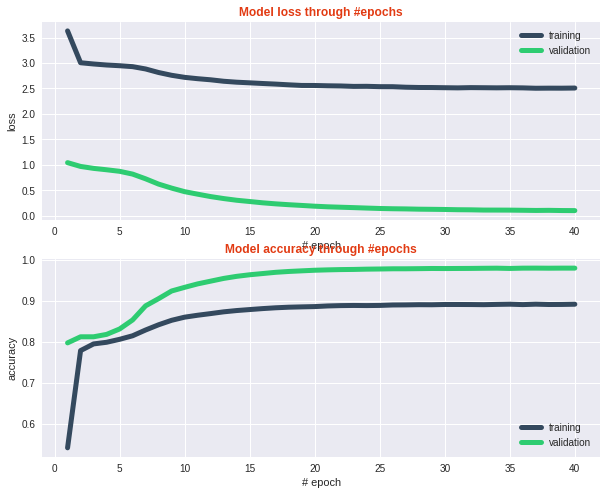

In [22]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('acc', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_acc', [])
)

In [0]:
from google.colab import files
files.download('/training-mb-01.png')

### Función que Permite convertir Indices en Tags

In [0]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

### Hacemos la prediccion sobre el conjunto de pruebas 

In [24]:
import pandas as pd

prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

['da0ms0', 'ncms000', 'aq0cs0', 'vaip3s0', 'vmp00sm', 'cs', 'da0fs0', 'ncfs000', 'sps00', 'vmn0000', 'vaip3s0', 'vmp00sm', 'sps00', 'Fe', 'vmn0000', 'Fe', 'Fc', 'cc', 'sn.e-SUJ', 'vaip3s0', 'vmp00sm', 'cs', 'da0ms0', 'ncms000', 'sps00', 'da0ms0', 'ncms000', 'vmip3s0', 'cs', 'sps00', 'da0ms0', 'np0000l', 'Fe', 'pi0mp000', 'vmip3p0', 'sps00', 'da0fs0', 'di0fs0', 'ncfs000', 'Fe', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-

### Hallamos los valores de F1 score, recall, precision

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

# print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



classification_report:
               precision    recall  f1-score   support

       -PAD-       0.00      0.00      0.00         0
         Faa       1.00      1.00      1.00         2
         Fat       1.00      1.00      1.00         5
          Fc       1.00      1.00      1.00      2291
          Fd       1.00      1.00      1.00        87
          Fe       1.00      1.00      1.00       631
          Fg       1.00      1.00      1.00       226
          Fh       0.00      0.00      0.00         3
         Fia       0.86      1.00      0.92         6
         Fit       1.00      1.00      1.00        19
          Fp       1.00      1.00      1.00      1178
         Fpa       1.00      1.00      1.00       156
         Fpt       1.00      1.00      1.00       160
          Fs       1.00      1.00      1.00        13
          Fx       1.00      1.00      1.00        41
          Fz       0.00      0.00      0.00         2
           W       0.98      0.61      0.76       194
  

## PARTE 4  -  Testing

### Creamos un pequeño Ejemplo

In [26]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo índice de adrenalina .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', 'índice', 'de', 'adrenalina', '.']]


### Convertimos el texto en Una entrada para el Modelo

In [27]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[ 7012  4849 14434  2069  8704 14782     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [22154  9204 23771 19490 23771 22154  6046 14120 23771 10456  9065     1
  147

### Se Ejecuta la predicion con la Entrada del modelo entrenado

In [28]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

[[[5.8158170e-03 2.5324748e-04 2.2709826e-03 ... 1.6241602e-04
   7.4876274e-04 4.1314145e-04]
  [3.1185491e-04 1.3111155e-04 9.0715736e-07 ... 5.6350545e-05
   1.2912080e-03 7.2988354e-05]
  [4.3521414e-04 4.1731852e-05 5.7387977e-05 ... 1.4069552e-05
   8.0415477e-05 4.3913275e-05]
  ...
  [9.9998093e-01 9.8772048e-08 2.0065650e-08 ... 8.6858670e-08
   5.6102603e-09 4.6878366e-08]
  [9.9996698e-01 1.9451741e-07 3.0217322e-08 ... 1.7112882e-07
   8.7355829e-09 7.6136494e-08]
  [9.9994218e-01 3.6297553e-07 4.1500073e-08 ... 3.1847824e-07
   1.4177168e-08 1.2405926e-07]]

 [[2.5832630e-04 1.8380011e-05 1.2066690e-06 ... 1.1637899e-05
   9.8273325e-05 5.3123604e-05]
  [3.1667302e-04 2.3348744e-05 1.6632507e-04 ... 1.6737327e-05
   4.3288937e-06 1.3028189e-04]
  [4.1382955e-03 1.6215675e-04 4.2014297e-05 ... 1.1260091e-04
   2.4529043e-04 6.9548381e-03]
  ...
  [9.9998093e-01 9.8710842e-08 2.0029514e-08 ... 8.6205247e-08
   5.6064842e-09 4.6646644e-08]
  [9.9996710e-01 1.9440265e-07 3.016

### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [29]:
#print(len(predictions))
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
print(log_tokens)

[['vmn0000', 'vsip3s0', 'aq0cs0', 'sps00', 'dp1css', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD

### Presentacion de los Resultados

In [31]:
#!pip install tabulate
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(tabulate(body2, headers=heads2))


## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp

Correr    es       importante    para    mi      .
--------  -------  ------------  ------  ------  ---
vmn0000   vsip3s0  aq0cs0        sps00   dp1css  Fp


El      hombre    bajo    corre    bajo    el      puente    con    bajo    índice    de     adrenalina    .
------  --------  ------  -------  ------  ------  --------  -----  ------  --------  -----  ------------  ---
da0ms0  ncms000   sps00   vmip3s0  sps00   da0ms0  ncms000   sps00  sps00   ncms000   sps00  np0000l       Fp


## PARTE 5  -  Mejorando la Precision y Exactitud del Modelo

### Definimos una clase que permita ignorar los Valores de Relleno

In [0]:
from keras import backend as K
 
def ignore_class_accuracy(to_ignore=0):
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
 
        ignore_mask = K.cast(K.not_equal(y_pred_class, to_ignore), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

### Definimos nuevamente nuestro modelo, agregado la clase Creada

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Dropout(0.5))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001),  metrics=['accuracy', ignore_class_accuracy(0)]) 

model.summary()

### Procedemos a Entrenar Nuevamente

In [0]:
model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)), batch_size=128, epochs=40, validation_split=0.2)

### Calculamos nuevamente la Precisión

In [0]:
scores2 = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores2[1] * 100}")   # acc: 99.09751977804825

### Relaizamos nuevamente el calculo de F1-score, recall, y precision

### Realizamos nuevamente una prueba con el Ejemplo de Prueba

In [0]:
predictions1 = model.predict(test_samples_X)
log_tokens1  = logits_to_tokens(predictions1, {i: t for t, i in tag2index.items()})
print(log_tokens1)

### Presentamos los Resultados

In [0]:
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(tabulate(body2, headers=heads2))